<a href="https://www.kaggle.com/code/snehaaapulse/predicting-house-prices-using-regression?scriptVersionId=197106593" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Predicting House Prices Using Regression

### Implementing a predictive model using regression techniques to predict house prices based on multiple features.





DATASET: https://www.kaggle.com/datasets/fedesoriano/california-housing-prices-data-extra-features

In [32]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
df = pd.read_csv('/content/California_Houses.csv')
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [34]:
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [35]:
df.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 20640 entries, 0 to 20639

Data columns (total 9 columns):

 #   Column              Non-Null Count  Dtype  

---  ------              --------------  -----  

 0   MedInc              20640 non-null  float64

 1   HouseAge            20640 non-null  float64

 2   AveRooms            20640 non-null  float64

 3   AveBedrms           20640 non-null  float64

 4   Population          20640 non-null  float64

 5   AveOccup            20640 non-null  float64

 6   Latitude            20640 non-null  float64

 7   Longitude           20640 non-null  float64

 8   Median_House_Value  20640 non-null  float64

dtypes: float64(9)

memory usage: 1.4 MB


## Data Preprocessing

In [37]:
# Check for missing values
print(df.isnull().sum())

Median_House_Value          0

Median_Income               0

Median_Age                  0

Tot_Rooms                   0

Tot_Bedrooms                0

Population                  0

Households                  0

Latitude                    0

Longitude                   0

Distance_to_coast           0

Distance_to_LA              0

Distance_to_SanDiego        0

Distance_to_SanJose         0

Distance_to_SanFrancisco    0

dtype: int64


In [38]:
# Load the dataset and inspect the features
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X, y = housing.data, housing.target
feature_names = housing.feature_names

# Normalize or scale the features as necessary for regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Exploratory Data Analysis (EDA)

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the feature matrix and target
df = pd.DataFrame(X, columns=feature_names)
df['Median_House_Value'] = y

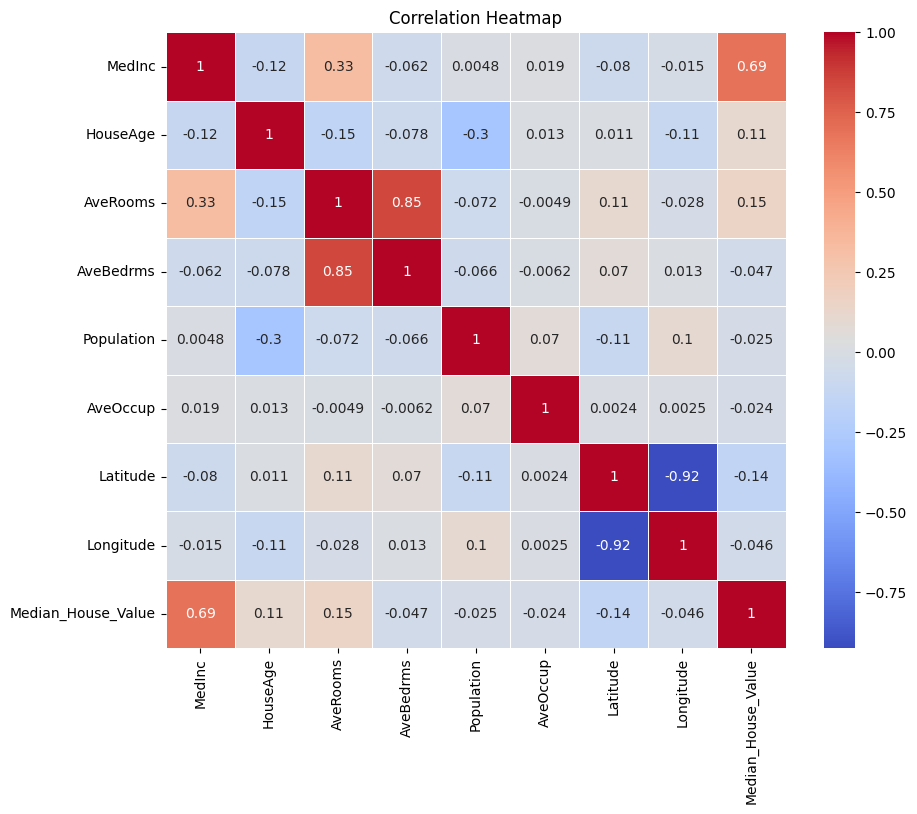

In [40]:
# Perform EDA to explore relationships between features and the target variable
# Visualize correlation heatmaps
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

INFERENCE:

- **Strong positive correlation:**  Median income has a strong positive correlation with the median house value. This suggests that higher income areas tend to have higher house prices.


- **Moderate positive correlation:**  HouseAge, Average Rooms, and Average Bedrooms have moderate positive correlations with the median house value. This indicates that older houses or houses with more rooms might have higher prices.


- **Weak correlation:**  Latitude and Longitude have weak correlations with the median house value. This suggests that geographical location alone might not be a strong predictor of house prices.


- **Negative correlation:**  Population and Average Occupancy have a negative correlation with the median house value. This suggests that areas with higher population density or higher average occupancy might have lower house prices.


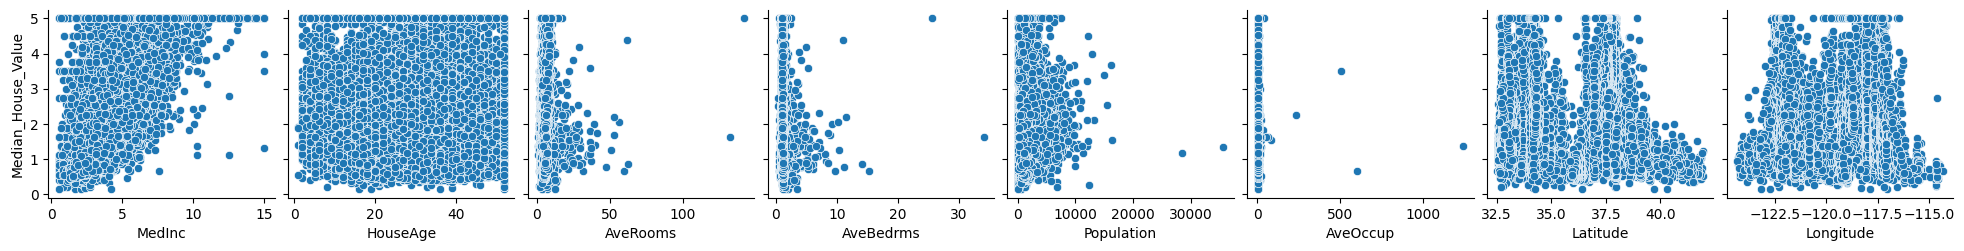

In [41]:
# Create scatter plots and histograms to analyze the data distribution and key relationships
sns.pairplot(df, x_vars=feature_names, y_vars='Median_House_Value', kind='scatter')
plt.show()

INFERENCE:

  - **Positive relationships:** Features like Median Income, Average Rooms, and HouseAge show a generally positive trend with the Median_House_Value. This means that as these features increase, the median house value tends to increase as well.


  - **Negative relationships:** Population and Average Occupancy show a somewhat negative trend with the Median_House_Value. This indicates that as these features increase, the median house value tends to decrease.


  - **No clear relationship:** Latitude and Longitude don't show a clear linear relationship with the Median_House_Value. This suggests that geographical location alone might not be a strong predictor of house prices.

  
  - **Outliers:** Some scatter plots might reveal outliers, which are data points that deviate significantly from the general trend. These outliers could influence the model's performance and might need to be addressed.


## Model Building

In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [44]:
# Build the following regression models
# 1. Multiple Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [45]:
# 2. Ridge Regression (L2 regularization)
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

Ridge()

In [46]:
# 3. Lasso Regression (L1 regularization)
model_lasso = Lasso(alpha=1.0)
model_lasso.fit(X_train, y_train)

Lasso()

## Hyperparameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search
hyperparameters = {'alpha': [0.1, 1.0, 10.0]}

In [61]:
# Use cross-validation to tune hyperparameters for Ridge Regression
grid_search_ridge = GridSearchCV(Ridge(), hyperparameters, cv=5)
grid_search_ridge.fit(X_train, y_train)
best_ridge_model = grid_search_ridge.best_estimator_

In [62]:
# Use cross-validation to tune hyperparameters for Lasso Regression
grid_search_lasso = GridSearchCV(Lasso(), hyperparameters, cv=5)
grid_search_lasso.fit(X_train, y_train)
best_lasso_model = grid_search_lasso.best_estimator_

In [65]:
# Compare the performance of models using cross-validated results to choose the best one
from sklearn.model_selection import cross_val_score

# Calculating cross-validated scores for each model
lr_scores = cross_val_score(model_lr, X_train, y_train, cv=5)
ridge_scores = cross_val_score(best_ridge_model, X_train, y_train, cv=5)
lasso_scores = cross_val_score(best_lasso_model, X_train, y_train, cv=5)

# Printing the mean cross-validated scores
print("Linear Regression Mean Score:", lr_scores.mean())
print("Ridge Regression Mean Score:", ridge_scores.mean())
print("Lasso Regression Mean Score:", lasso_scores.mean())

# Comparing the scores and choose the best model based on the highest mean score
if lr_scores.mean() > ridge_scores.mean() and lr_scores.mean() > lasso_scores.mean():
  print("Linear Regression is the best model.")
elif ridge_scores.mean() > lr_scores.mean() and ridge_scores.mean() > lasso_scores.mean():
  print("Ridge Regression is the best model.")
else:
  print("Lasso Regression is the best model.")


Linear Regression Mean Score: 0.6114839952560993

Ridge Regression Mean Score: 0.6114840058334444

Lasso Regression Mean Score: 0.4971581676209015

Ridge Regression is the best model.


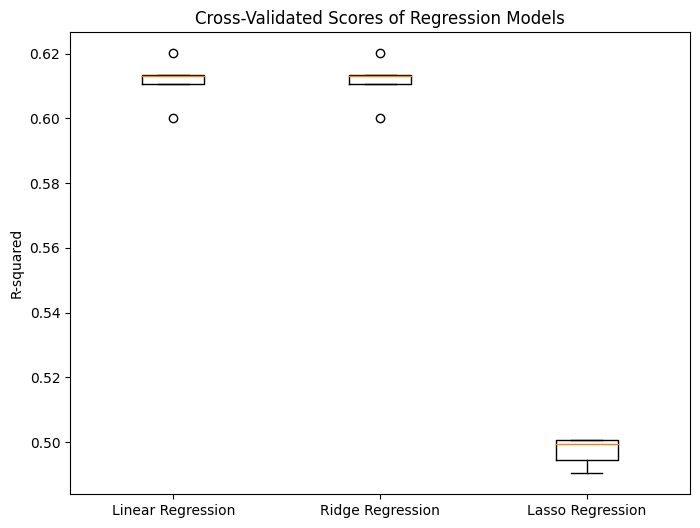

In [67]:
# Visualizing the cross-validated scores
plt.figure(figsize=(8, 6))
plt.boxplot([lr_scores, ridge_scores, lasso_scores], labels=['Linear Regression', 'Ridge Regression', 'Lasso Regression'])
plt.title('Cross-Validated Scores of Regression Models')
plt.ylabel('R-squared')
plt.show()


# Model Evaluation

In [51]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions
y_pred_lr = model_lr.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)
y_pred_lasso = model_lasso.predict(X_test)

In [52]:
# Calculate RMSE, R-squared, and MAE for each model
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

In [69]:
# Compare the performance of all models and provide an analysis
print("Performance Metrics:")
print("Multiple Linear Regression:")
print("RMSE:", rmse_lr)
print("R-squared (R²) score:", r2_lr)
print("Mean Absolute Error (MAE):", mae_lr)
print("-----------------------------------")
print("Ridge Regression:")
print("RMSE:", rmse_ridge)
print("R-squared (R²) score:", r2_ridge)
print("Mean Absolute Error (MAE):", mae_ridge)
print("-----------------------------------")
print("Lasso Regression:")
print("RMSE:", rmse_lasso)
print("R-squared (R²) score:", r2_lasso)
print("Mean Absolute Error (MAE):", mae_lasso)

Performance Metrics:

Multiple Linear Regression:

RMSE: 0.7455813830127761

R-squared (R²) score: 0.5757877060324511

Mean Absolute Error (MAE): 0.5332001304956565

-----------------------------------

Ridge Regression:

RMSE: 0.745554290938461

R-squared (R²) score: 0.575818534544132

Mean Absolute Error (MAE): 0.5331933646313113

-----------------------------------

Lasso Regression:

RMSE: 1.1448563543099792

R-squared (R²) score: -0.00021908714592466794

Mean Absolute Error (MAE): 0.9060685490007149


## Visualisation for all performance metrics

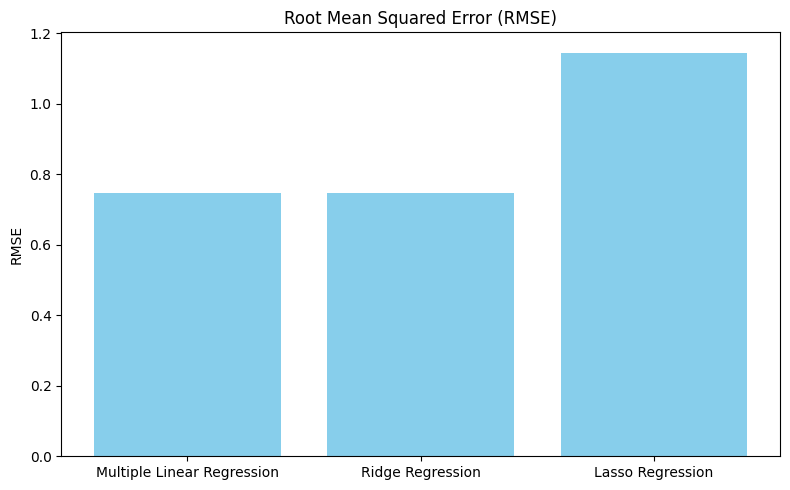

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics for each model
models = ['Multiple Linear Regression', 'Ridge Regression', 'Lasso Regression']
rmse_values = [rmse_lr, rmse_ridge, rmse_lasso]
r2_values = [r2_lr, r2_ridge, r2_lasso]
mae_values = [mae_lr, mae_ridge, mae_lasso]

# Create RMSE plot
fig, ax_rmse = plt.subplots(figsize=(8, 5))
ax_rmse.bar(models, rmse_values, color='skyblue')
ax_rmse.set_title('Root Mean Squared Error (RMSE)')
ax_rmse.set_ylabel('RMSE')
plt.tight_layout()
plt.show()

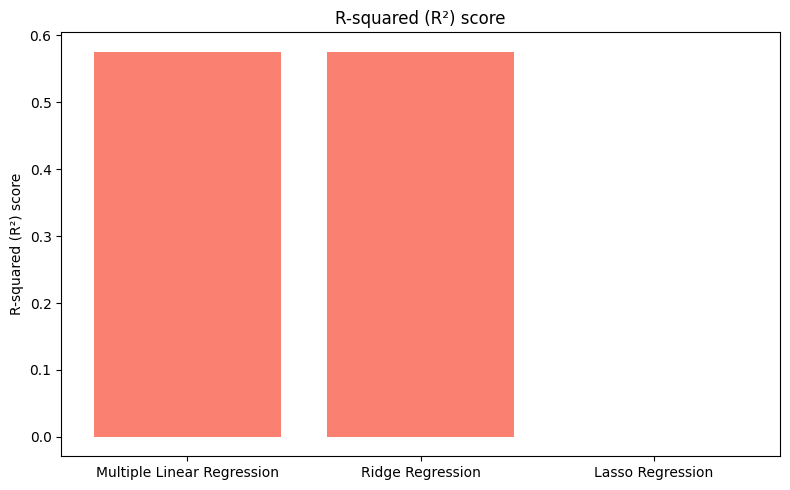

In [56]:
# Create R-squared plot
fig, ax_r2 = plt.subplots(figsize=(8, 5))
ax_r2.bar(models, r2_values, color='salmon')
ax_r2.set_title('R-squared (R²) score')
ax_r2.set_ylabel('R-squared (R²) score')
plt.tight_layout()
plt.show()

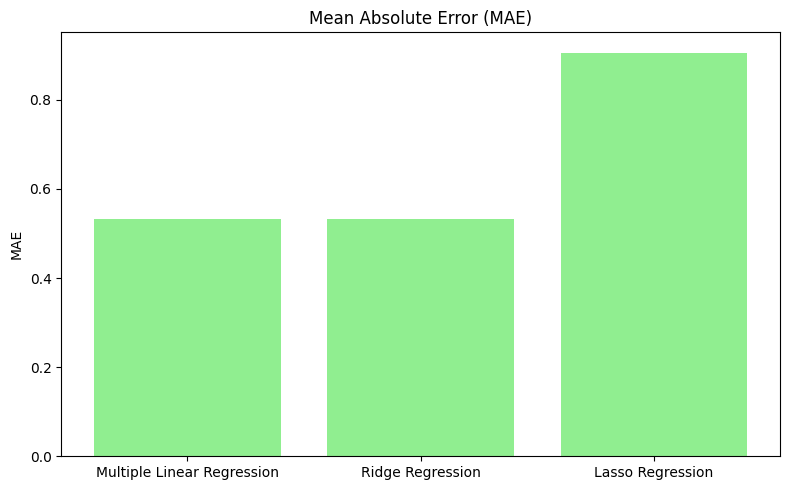

In [57]:
# Create MAE plot
fig, ax_mae = plt.subplots(figsize=(8, 5))
ax_mae.bar(models, mae_values, color='lightgreen')
ax_mae.set_title('Mean Absolute Error (MAE)')
ax_mae.set_ylabel('MAE')
plt.tight_layout()
plt.show()

## Analysis of Model Performance:

Ridge Regression has the lowest RMSE, suggesting better prediction accuracy.

Ridge Regression has the highest R-squared, suggesting a better fit to the data.

Ridge Regression has the lowest MAE, suggesting smaller average prediction errors.

